<a href="https://colab.research.google.com/github/kimdonggyu2008/audio_synthesis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install import_ipynb
import import_ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00


In [ ]:
cd /content/drive/MyDrive/오디오_합성/

/content/drive/MyDrive/오디오_합성


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from autoencoder import Autoencoder
from train import load_mnist

ImportError: cannot import name 'Autoencoder' from 'autoencoder' (autoencoder.ipynb)

In [ ]:
def select_images(images,labels,num_images=10):
  sample_images_index=np.random.choice(range(len(images)),num_images)
  sample_images=images[sample_images_index]
  sample_labels=labels[sample_images_index]
  return sample_images,sample_labels

def plot_reconstructed_images(images,reconstructed_images):#나온 이미지들 보여주기
  fig=plt.fiture(figsize(15,3))
  num_images=len(images)
  for i,(image,reconstructed_images) in enumerate(zip(images,reconstructed_images)):
    image=image.squeeze()
    ax=fig.add_subplot(2,num_images,i+1)
    ax.axis("off")
    ax.imshow(image,cmap="gray_r")
    reconstructed_image=reconstructed_image.squeeze()
    ax=fig.add_subplot(2,num_images,i+num_images+1)
    ax.axis=("off")
    ax.imshow(reconstructed_images,cmap="gray_r")
  plt.show()

def plot_images_encodes_in_latent_space(latent_representations,sample_labels):# 특징공간 보여주기
  plt.figure(figsize=(10,10))
  plt.scatter(latent_representations[:,0],
              latent_representations[:,1],
              cmap="rainbow",
              c=sample_labels,
              alpha=0.5,
              s=2)
  plt.colorbar()
  plt.show()

if __name__=="__main__":
  autoencoder=Autoencoder.load("model")#저장된 모델 읽어오기
  x_train,y_train,x_test,y_test=load_mnist() #train에서 mnist값 가져오기

  num_sample_images_to_show=8 #보여줄 갯수
  sample_images,_=select_images(x_test,y_test,num_sample_images_to_show) #테스트 샘플에서 보여주기
  reconstructed_images,_=autoencoder.reconstruct(sample_images)
  plot_reconstructed_images(sample_images,reconstructed_images)

  num_images=6000 #사용할 전체 이미지 갯수
  sample_images,sample_labels=selct_images(x_test,y_test,num_images) #6000개만큼의 사진, 라벨 분류작업
  _, latent_representations=autoencoder.reconstruct(sample_images) #새로 생성된 특징공간, 생성된 그림들
  plot_images_encodes_in_latent_space(latent_representations,sample_labels)#나온 결괏값 보여줌

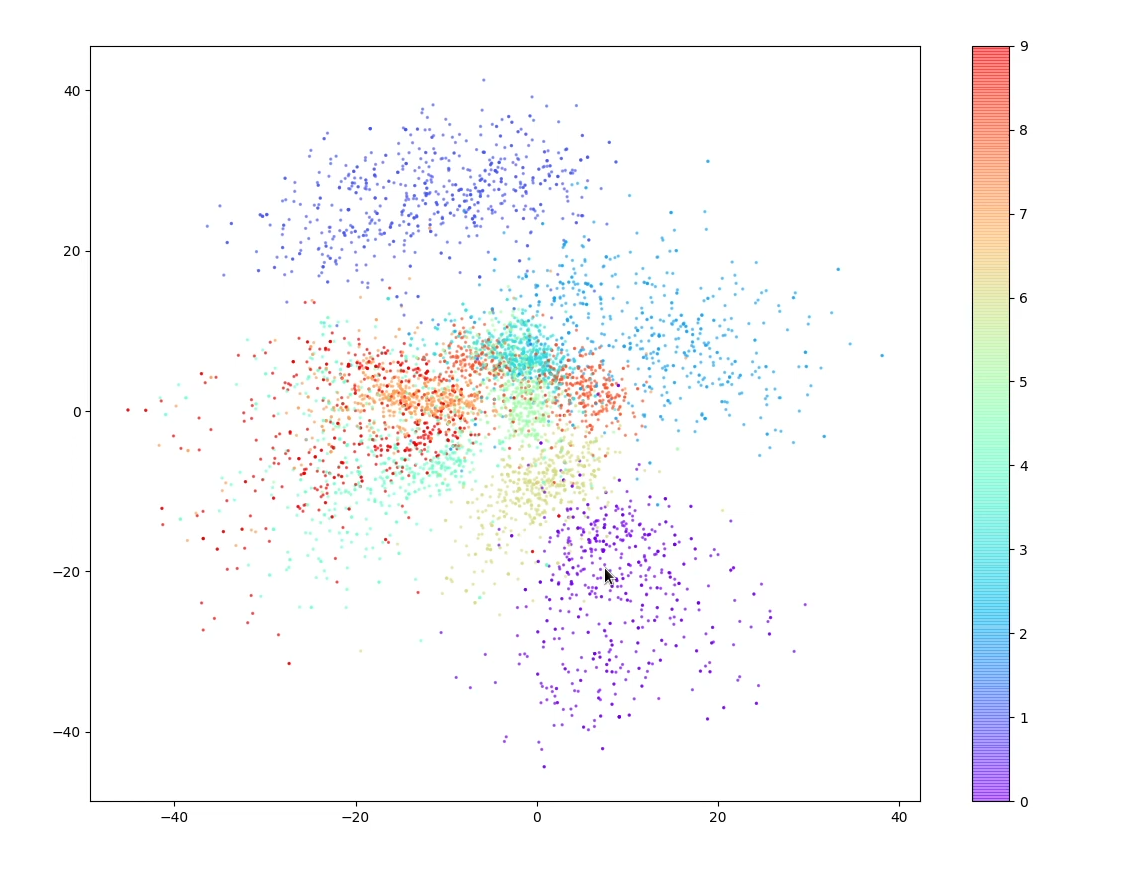

**기본 오토 인코더의 문제**

원점 기준으로 대칭이 아님

넓게 펴져있는 경우에는 다양성이 큰 경우
좁은 경우에는 다양성이 작은 경우임

몇몇 특징이 불연속적임